# Artificial Neural Network 2

This time, I wlil implement a neural network on a dataset with epistatic pattern.

## Part 1: Data exploration
### Understand raw data

In [144]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import sklearn
%matplotlib inline

In [145]:
pd.set_option('display.max_columns', None)# display all the columns
raw_data = pd.read_csv('a_20s_1600her_0.4__maf_0.2_EDM-2_01.txt', sep = "\t")# read in dataset

In [146]:
raw_data.head()

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,M0P0,M0P1,Class
0,0,0,0,0,0,0,0,2,0,0,1,2,1,2,1,0,1,0,1,1,1
1,1,0,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1,1,1,1
2,0,0,0,1,0,0,0,2,0,0,0,1,0,1,1,0,0,0,0,0,1
3,0,0,0,1,2,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1
4,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1


In [147]:
print ("Number of rows: " + str(raw_data.shape[0])) # row count
print ("Number of columns: " + str(raw_data.shape[1])) # column count

Number of rows: 1600
Number of columns: 21


In [148]:
raw_data.describe() # descriptive statistics 

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,M0P0,M0P1,Class
count,1600.000000,1600.00000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000
mean,0.222500,0.41250,0.21750,0.890625,0.888125,0.142500,0.335625,1.024375,0.114375,0.595000,0.688750,0.875000,0.798750,0.85375,0.791875,0.281250,0.682500,0.33000,0.396875,0.426250,0.500000
std,0.439448,0.55343,0.43768,0.687537,0.706874,0.358503,0.523834,0.675697,0.328041,0.652872,0.666822,0.702448,0.701645,0.68202,0.678304,0.481968,0.680612,0.51601,0.561972,0.576427,0.500156
min,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.00000,0.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.500000
75%,0.000000,1.00000,0.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,2.000000,2.00000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000


In [149]:
raw_data.isnull().values.any() # check missing data

False

### Understand the features

Text(0,0.5,'Count')

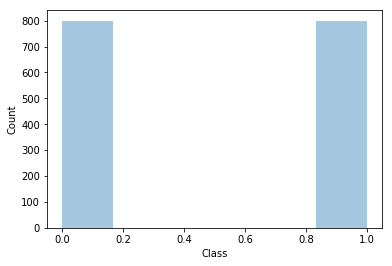

In [150]:
sb.distplot(raw_data['Class'],kde=False) # The outcome is labeled as 'class'
plt.ylabel("Count")

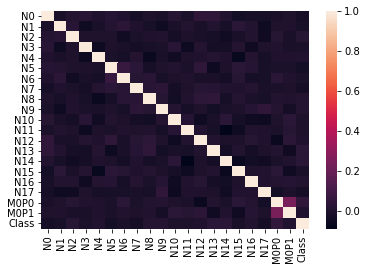

In [151]:
# Use heat map to visualize correlation between each column
corr = raw_data[['N0','N1','N2','N3','N4','N5','N6','N7','N8','N9','N10','N11','N12','N13','N14','N15','N16','N17','M0P0','M0P1','Class']].corr()
sb.heatmap(corr)

In [152]:
corr

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,M0P0,M0P1,Class
N0,1.000000,-0.009900,0.018111,0.030919,0.005693,0.020920,0.006839,-0.022489,0.001226,-0.006147,0.027328,-0.007091,0.052015,0.048128,0.012782,-0.026944,-0.014574,-0.020629,-0.013390,0.000630,-0.022763
N1,-0.009900,1.000000,0.029562,-0.044069,-0.013049,0.018755,0.039882,0.004871,-0.015458,-0.046214,-0.012837,0.015283,-0.011556,0.012468,-0.016056,0.036048,0.012535,-0.045551,0.000126,0.003284,-0.015815
N2,0.018111,0.029562,1.000000,0.000130,0.001885,0.001634,-0.037636,-0.007364,0.005216,0.008623,-0.025039,-0.005085,-0.010111,-0.019076,-0.037017,-0.011488,0.013625,-0.041093,0.027683,-0.013225,0.025712
N3,0.030919,-0.044069,0.000130,1.000000,-0.050929,-0.005233,-0.010880,-0.023874,-0.016594,-0.008185,0.029371,-0.051635,0.016570,-0.024798,-0.024704,0.017398,-0.042182,-0.000441,0.007208,-0.011687,-0.008184
N4,0.005693,-0.013049,0.001885,-0.050929,1.000000,-0.006151,-0.018449,0.017497,-0.058058,-0.011512,-0.038097,-0.004251,0.005014,0.019226,0.004886,-0.061781,0.017116,-0.020455,0.004787,0.005063,0.007960
N5,0.020920,0.018755,0.001634,-0.005233,-0.006151,1.000000,0.074854,0.034705,-0.021683,0.000908,0.015605,-0.008692,0.046952,-0.050273,-0.001408,0.035742,0.024067,-0.017715,-0.007722,-0.006613,-0.027903
N6,0.006839,0.039882,-0.037636,-0.010880,-0.018449,0.074854,1.000000,0.026345,0.031228,-0.017400,-0.005118,0.010410,-0.010088,-0.011315,-0.025058,0.024693,-0.020177,-0.016681,0.033732,0.008500,-0.008354
N7,-0.022489,0.004871,-0.007364,-0.023874,0.017497,0.034705,0.026345,1.000000,0.029736,0.040821,-0.023403,-0.000165,0.027502,0.024025,0.009711,0.003901,0.016839,-0.012322,-0.005728,-0.002607,-0.023132
N8,0.001226,-0.015458,0.005216,-0.016594,-0.058058,-0.021683,0.031228,0.029736,1.000000,0.026617,-0.034426,0.010517,0.043008,0.046860,-0.022241,0.017924,-0.008116,-0.016219,0.014831,0.009910,0.017153
N9,-0.006147,-0.046214,0.008623,-0.008185,-0.011512,0.000908,-0.017400,0.040821,0.026617,1.000000,0.016247,-0.020455,-0.000560,-0.029172,-0.009695,-0.003478,0.021477,0.049825,0.019048,-0.024578,0.017237


In [153]:
y = raw_data.iloc[:, -1].values
X = raw_data.iloc[:, :-1].values

## Part 2: Training a Neural Network

### Implementation
Let's build a 2-layer neural network with one input layer, one hidden layer, and one output layer (note that the input layer is typically excluded when counting the number of layers in a Neural Network). 

The number of nodes in the input layer is equal to the number of features (columns) in my data, 20. 
The number of nodes in the output layer is determined by the number of classes we have, 2. 
For the number of nodes in the hidden layer, I will choose 11 which is the mean of the neurons in the input and output layers.

We will choose tanh as the activation function for our hidden layer and softmax function for output layer.

In [154]:
# neural network structure
num_input_layer = 20 # number of nodes in input layer
num_output_layer = 2 # number of nodes in output layer
num_hidden_layer = 11 # number of nodes in hidden layer


In [155]:
# Gradient descent parameters 
learning_rate = 0.001
regularization_lambda = 0.01

In [156]:
# This function predicts output(0 or 1).It calculate the output of the neural network and return the class with highest probability. 
def predict(m, x):
    w1, w2, b1, b2 = m['w1'],m['w2'],m['b1'],m['b2']
    
    # feedforward
    z1 = x.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [157]:
# This functions calculates total loss
def total_loss(m, X = X, y = y):
    w1, w2, b1, b2 = m['w1'],m['w2'],m['b1'],m['b2']
    train_size = len(X)
    # feedforward
    z1 = X.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # calculate loss
    loss_sum = np.sum(-np.log(probs[range(train_size), y]))
    loss  = 1.0/train_size * loss_sum
    return loss

In [158]:
# This function returns a neural net work model with learned parameters
# num_n_hidden: number of nodes in hidden layer
# num_iteration: number of passes through the training data for gradient descent
# print_loss: print the loss every 1000 iterations when True
def nn_model( num_n_hidden, num_iteration,learning_rate, print_loss = False, X = X, y = y):
    # we will return a model with parameters at the end: 
    model = {}
    train_size = len(X)
    
    # initialize parameters 
    np.random.seed(39)
    w1 = np.random.randn(num_input_layer , num_n_hidden) / np.sqrt(num_input_layer )
    b1 = np.zeros((1, num_n_hidden))
    w2 = np.random.randn(num_n_hidden, num_output_layer) / np.sqrt(num_n_hidden)
    b2 = np.zeros((1, num_output_layer))
    
    # gradient descent
    for i in range(0, num_iteration):
        # feedforward
        z1 = X.dot(w1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(w2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # backpropagation
        delta3 = probs
        delta3[range(train_size), y] -= 1
        dw2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(w2.T) * (1 - np.power(a1, 2))
        dw1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dw2 += regularization_lambda * w2
        dw1 += regularization_lambda * w1
        # Gradient descent parameter update
        w1 += -learning_rate * dw1
        b1 += -learning_rate * db1
        w2 += -learning_rate * dw2
        b2 += -learning_rate * db2
        
        model = {'w1':w1, 'w2':w2, 'b1':b1, 'b2':b2}
        
        #print loss
        if print_loss and i % 1000 == 0:
            print('Loss after %i iteration:%f' %(i,total_loss(model,X = X, y = y)))
    
    return model

### K-fold Cross-Validation

In [159]:
from sklearn.cross_validation import KFold

In [160]:
# This function does 10-fold. It saves the result at each time as different parts of y_pred. 
# In the end, it returns the y_pred as the result of all the 10-fold.
def run_cv(X,y,iteration):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=10,shuffle=True) # Total number of elements；Number of folds， default=3；Whether to shuffle the data before splitting into batches
    y_pred = y.copy()
     
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        m = nn_model(num_hidden_layer,iteration, learning_rate,print_loss = False,X = X_train, y = y_train)
        y_pred[test_index] = predict(m, X_test)
         
    return y_pred

### Train a neural network with a hidden layer size of 11

In [161]:
# with learning_rate = 0.001
model = nn_model(num_hidden_layer,20000, learning_rate,print_loss = True)

Loss after 0 iteration:0.765664
Loss after 1000 iteration:0.369510
Loss after 2000 iteration:0.272611
Loss after 3000 iteration:0.237245
Loss after 4000 iteration:0.216944
Loss after 5000 iteration:0.205759
Loss after 6000 iteration:0.197935
Loss after 7000 iteration:0.191417
Loss after 8000 iteration:0.186782
Loss after 9000 iteration:0.183306
Loss after 10000 iteration:0.180020
Loss after 11000 iteration:0.177243
Loss after 12000 iteration:0.174940
Loss after 13000 iteration:0.173447
Loss after 14000 iteration:0.173236
Loss after 15000 iteration:0.169890
Loss after 16000 iteration:0.170789
Loss after 17000 iteration:0.166717
Loss after 18000 iteration:0.165996
Loss after 19000 iteration:0.168925


In [162]:
y_pred = run_cv(X, y,20000)

In [163]:
# This function calculates accuracy
def accuracy(y_true,y_pred):
    return np.mean(y_true == y_pred) # NumPy interpretes True and False as 1. and 0.

In [164]:
print('Neural network accuracy: ' + str(accuracy(y, y_pred)))


Neural network accuracy: 0.7375


Run more iterations to see if the accuracy gets higher

In [165]:
model_3 = nn_model(num_hidden_layer,30000, learning_rate,print_loss = True)

Loss after 0 iteration:0.765664
Loss after 1000 iteration:0.369510
Loss after 2000 iteration:0.272611
Loss after 3000 iteration:0.237245
Loss after 4000 iteration:0.216944
Loss after 5000 iteration:0.205759
Loss after 6000 iteration:0.197935
Loss after 7000 iteration:0.191417
Loss after 8000 iteration:0.186782
Loss after 9000 iteration:0.183306
Loss after 10000 iteration:0.180020
Loss after 11000 iteration:0.177243
Loss after 12000 iteration:0.174940
Loss after 13000 iteration:0.173447
Loss after 14000 iteration:0.173236
Loss after 15000 iteration:0.169890
Loss after 16000 iteration:0.170789
Loss after 17000 iteration:0.166717
Loss after 18000 iteration:0.165996
Loss after 19000 iteration:0.168925
Loss after 20000 iteration:0.162540
Loss after 21000 iteration:0.162035
Loss after 22000 iteration:0.160970
Loss after 23000 iteration:0.160379
Loss after 24000 iteration:0.168081
Loss after 25000 iteration:0.164793
Loss after 26000 iteration:0.158007
Loss after 27000 iteration:0.166841
Loss 

In [166]:
y_pred_3 = run_cv(X, y,30000)

In [167]:
print('Neural network accuracy: ' + str(accuracy(y, y_pred_3)))

Neural network accuracy: 0.73125


Running more iterations did not increase accuracy. one possible reason is that larger iteration numbers lead to overfitting.